In [98]:
import pandas as pd
import numpy as np

In [99]:
# Chat analyzer

In [100]:
# Chat anylyser:
    # Create dataset
    # preprocess

In [101]:
import json
msg = json.load(open("group.json", "r"))

In [102]:
total_users = [user['name'].split(" ")[0] for user in msg['participants']]

In [115]:
total_users

['ð\x9d\x99\x8eð\x9d\x99ªð\x9d\x99¨ð\x9d\x99\x9dð\x9d\x99\x96ð\x9d\x99£ð\x9d\x99©',
 'Harsh',
 'Aniket',
 'Athrav',
 'Om',
 'Prafull']

In [103]:
sender_name = []
sender_content = []

for m in msg['messages']:
    
    if "content" in m.keys():
        sender_name.append(m['sender_name'].split(" ")[0])
        if "sent an attachment." in m['content'] :
            sender_content.append("reel")
        else:
            sender_content.append(m['content'])
    else :
        sender_name.append(m['sender_name'].split(" ")[0])
        sender_content.append("media")


In [104]:
print("name ", len(sender_name))
print("content ", len(sender_content))

name  714
content  714


In [105]:
df_dict = {
    "users": sender_name,
    "msgs" : sender_content,
}

df = pd.DataFrame(df_dict)


In [106]:
df[df['msgs'] == "media"]

,users,msgs
11,Prafull,media
32,ððªð¨ððð£ð©,media
36,ððªð¨ððð£ð©,media
43,Prafull,media
146,Prafull,media
147,ððªð¨ððð£ð©,media
170,ððªð¨ððð£ð©,media
190,Prafull,media
199,Harsh,media
205,Harsh,media


In [107]:
def word_count(text : str):
    if "reel" not in text and "media" not in text:
        return len(text.split(" "))
    
    else:
        return 0

In [108]:
df['word_count'] = df['msgs'].apply(word_count)

In [109]:
f = open("hinglish-stopword.txt","r")
stopwords = [word.split("\n")[0] for word in f.readlines()]

In [110]:
from nltk import word_tokenize
from string import punctuation
from nltk.stem import PorterStemmer

ps = PorterStemmer()

y = []
for text in df['msgs']:
    text = text.lower()
    for word in word_tokenize(text):
        if str.isalnum(word) and word not in punctuation and word not in stopwords:
            y.append(ps.stem(word))

# print(stopwords)

In [111]:
from collections import Counter
counter = Counter(y)

x = []
y = []
for item in counter.most_common(30):
    x.append(item[0])
    y.append(item[1])

In [112]:
from matplotlib import pyplot as plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

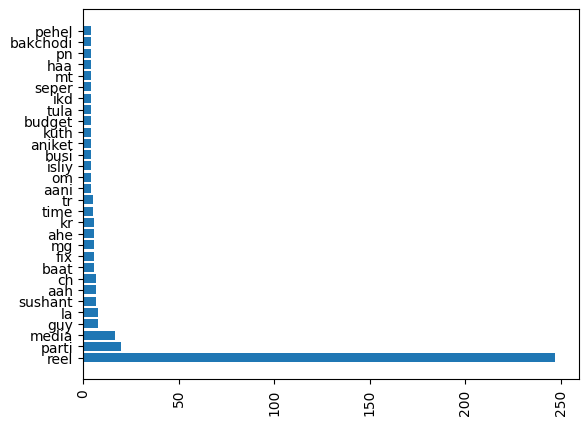

In [144]:
plt.barh(x, width=y)
plt.xticks(rotation=90)
plt.show()

In [116]:
df.to_csv("main.csv")

In [123]:
len(df[df['msgs'] == "media"])

17

In [129]:
msg['messages'][0]['share']['link']

'https://www.instagram.com/reel/C1M9_f1Sa6z/?id=3264256474280996531_31547733136'

In [146]:
active = df['users'].value_counts()

/home/prafull/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/prafull/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/prafull/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/prafull/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


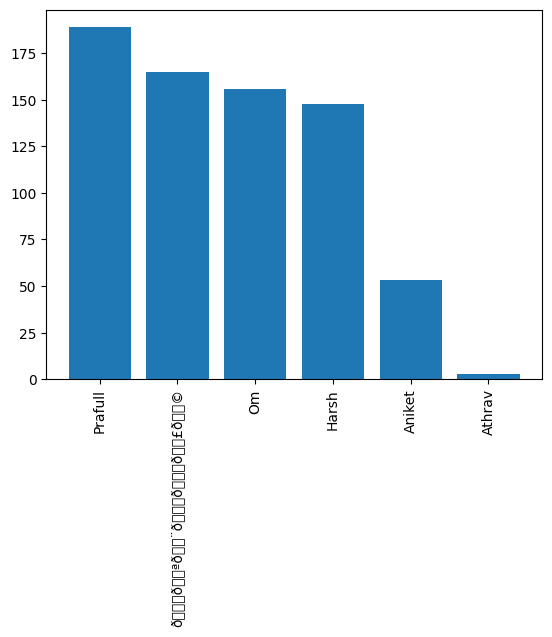

In [153]:
plt.bar(active.index, height=active.values)
plt.xticks(rotation=90)
plt.show()

In [158]:
round((df['users'].value_counts() / df.shape[0])*100,2).reset_index().rename(columns={"count" : "Percentage"})

,users,Percentage
0,Prafull,26.47
1,ððªð¨ððð£ð©,23.11
2,Om,21.85
3,Harsh,20.73
4,Aniket,7.42
5,Athrav,0.42
